# Higway Networks

In [ ]:
import sys
sys.path.append('src/')

import matplotlib.pyplot as plt
import theano.tensor as T
from matplotlib import pyplot
import pandas as pd
import numpy as np
import pickle
import time
%matplotlib inline  
from HighwayNetworks import test_Highway, test_Highway_Momentum
from project_nn import load_data

data = load_data('mnist.pkl.gz')

## Hyperparameter search using RMSprop

In the following file we have the results for the first hyperparametes search we have done.

In [ ]:
res = pd.read_csv('src/RMSPropResults.csv',index_col=False, encoding='utf-7')

## Hyperparameter search and Training of the best selected model
### Depth 10

**Look at the best parameters in the paper results by inspecting the graphs of the xentropy.**

In [5]:
# Best selected models
best_10 = np.array([6,7,19,39,41,60,61,66,67,76,92,94,97])

best_10_df = pd.read_csv('src/PaperHyperparameterSearch_Highway.csv').iloc[best_10]

best_10_df.sort_values('result')

,result,activation,f_bias,num_layers,initial_lr,lr_factor,lr_min,momentum,batch_size,size
76,0.000010,rel,-1,10,0.034174,0.989103,0.00001,0.765204,20,50
41,0.000013,rel,-2,10,0.158693,0.987334,0.00001,0.255830,20,50
19,0.000024,rel,-1,10,0.106065,0.972970,0.00001,0.957930,20,50
61,0.000026,tanh,-2,10,0.577033,0.977962,0.00001,0.974775,20,50
97,0.000034,tanh,-1,10,0.571283,0.966434,0.00001,0.920391,20,50
60,0.000047,rel,-2,10,0.079635,0.977465,0.00001,0.006431,20,50
7,0.000048,rel,-1,10,0.013113,0.988194,0.00001,0.980878,20,50
67,0.000061,tanh,-2,10,0.148855,0.983595,0.00001,0.921287,20,50
66,0.000088,rel,-3,10,0.238383,0.957212,0.00001,0.140128,20,50
6,0.000109,rel,-7,10,0.261462,0.978969,0.00001,0.250778,20,50


**Based on the above results we restrict our search between the following ranges**
- Bias being -1,-2,-3. 
- Initial learning rate will be chosen chosen between 0.01311 and 0.577. 
- We will use both relu and tanh. 
- Learning rate decay factor will be between 0.9327 and 0.98910. 
- Momentum between 0.25 and .98462. 
- Batch size set to 20.

In [ ]:
# Results will be saved
learning_rates = [0.2, 0.15, 0.1]
learning_decay = [.95, .97, .99]
momentum = [0.25, 0.75, 0.9, 0.99]
activations = [T.nnet.nnet.relu,T.tanh]
biases = [-1,-2,-3]

for act in activations:
    for lr in learning_rates:
         for b in biases:
                for m in momentum:
                    for lr_decay in learning_decay:
                        t_0 = time.time()
                        test_Highway_Momentum(data, learning_rate=lr, lr_decay=lr_decay, 
                                              momentum=m, n_epochs=50, n_hidden=50, 
                                              n_hiddenLayers=1, n_highwayLayers = 9, 
                                              activation_hidden = T.nnet.nnet.relu, 
                                              activation_highway = act, b_T = b,
                                              batch_size=20, verbose=True, 
                                              early_stopping=False)
                        print(time.time()-t_0,act,lr,b,m,lr_decay)

In [8]:
res = pd.read_csv('src/Results10.csv').iloc[:,1:]
res.sort_values('XEntropy').iloc[0,:]

Running time                                              0.846642
XEntropy                                               0.000233313
Test performance                                                 0
Best Validation score                                          inf
Max epochs                                                      50
N epochs                                                        50
Activation function - hidden     <function relu at 0x7fea12451ed8>
Activation function - highway    <function relu at 0x7fea12451ed8>
L2_reg parameter                                                 0
L1_reg parameter                                                 0
Batch size                                                      20
Iterations                                                       1
Hidden neurons per layer                                        50
Hidden Layers                                                    1
Highway Layers                                                

In [ ]:
# Running the optimal model for 400 epochs
test_Highway_Momentum(data,
                      learning_rate=0.1,
                      lr_decay=0.99,
                      momentum=.75,
                      n_epochs=400, n_hidden=71,
                      n_hiddenLayers=10,
                      n_highwayLayers = 0,
                      activation_hidden = T.nnet.nnet.relu,
                      activation_highway = T.nnet.nnet.relu, 
                      b_T = -2, L1_reg = 0,
                      L2_reg = 0, batch_size=20, 
                      verbose=True, early_stopping=False)

In [9]:
# Best Depth 10 Highway Network result
xentropy_highway_10 = pickle.load(open("src/cross_entropy_10.p", "rb"))
xentropy_highway_10_df = pd.DataFrame.from_dict(xentropy_highway_10,orient='index')
xentropy_highway_10_df.columns= ['XEntropy']
xentropy_highway_10_df.tail()

,XEntropy
396,0.000003
397,0.000003
398,0.000003
399,0.000003
400,0.000003


In [10]:
# Plain highway network
xentropy_plain_10 = pickle.load(open("src/cross_entropy_plain_10.p", "rb"))
xentropy_plain_10_df = pd.DataFrame.from_dict(xentropy_plain_10,orient='index')
xentropy_plain_10_df.columns= ['XEntropy']
xentropy_plain_10_df.tail()

,XEntropy
396,0.000001
397,0.000001
398,0.000001
399,0.000001
400,0.000001


## Depth 20

**Look at the best parameters in the paper results by inspecting the graphs of the xentropy.**

In [11]:
# Best selected models
best_20 = [119,125,129,130,147,153,164,168,175,178,180,192,193]

best_20_df = pd.read_csv('src/PaperHyperparameterSearch_Highway.csv').iloc[best_20]

best_20_df.sort_values('result')

,result,activation,f_bias,num_layers,initial_lr,lr_factor,lr_min,momentum,batch_size,size
147,0.000047,rel,-6,20,0.153151,0.986925,0.00001,0.931897,20,50
153,0.000062,rel,-5,20,0.174630,0.974604,0.00001,0.884483,20,50
125,0.000075,rel,-3,20,0.256850,0.949827,0.00001,0.622238,20,50
164,0.000084,tanh,-4,20,0.258119,0.987172,0.00001,0.844354,20,50
119,0.000100,tanh,-1,20,0.598473,0.936181,0.00001,0.982707,20,50
193,0.000104,rel,-2,20,0.055001,0.959435,0.00001,0.924570,20,50
168,0.000109,tanh,-3,20,0.276412,0.972960,0.00001,0.181094,20,50
130,0.000132,tanh,-3,20,0.111748,0.985916,0.00001,0.691222,20,50
192,0.000148,tanh,-5,20,0.518281,0.971856,0.00001,0.984009,20,50
178,0.000153,rel,-10,20,0.316074,0.982813,0.00001,0.789495,20,50


**Based on the above results we restrict our search between the following ranges**
- Bias being -5,-4,-3. 
- Initial learning rate will be chosen chosen between 0.1 and 0.25. 
- We will use both relu and tanh. 
- Learning rate decay factor will be between 0.9, 0.97, 0.99. 
- Momentum between 0.7 and .9. 
- Batch size set to 20.

In [ ]:
# Hyperparameter search for Depth 20
learning_rates = [0.20, 0.15, 0.1]
learning_decay = [.9, .97, .99]
momentum = [0.7, 0.8, 0.9]
activations = [T.nnet.nnet.relu,T.tanh]
biases = [-5,-4,-3]

for act in activations:
    for lr in learning_rates:
         for b in biases:
                for m in momentum:
                    for lr_decay in learning_decay:
                        t_0 = time.time()
                        test_Highway_Momentum(data, learning_rate=lr, lr_decay=lr_decay, 
                                              momentum=m, n_epochs=50, n_hidden=50, 
                                              n_hiddenLayers=1, n_highwayLayers = 19, 
                                              activation_hidden = T.nnet.nnet.relu, 
                                              activation_highway = act, b_T = b,
                                              batch_size=20, verbose=True, 
                                              early_stopping=False)
                        print(time.time()-t_0,act,lr,b,m,lr_decay)       

In [13]:
res = pd.read_csv('src/Results20.csv')
best = res.sort_values('XEntropy').iloc[:,1:]

best.iloc[0]

Running time                                               1.66617
XEntropy                                               0.000362623
Test performance                                                 0
Best Validation score                                          inf
Max epochs                                                      50
N epochs                                                        50
Activation function - hidden     <function relu at 0x7f4e40328ed8>
Activation function - highway    <function relu at 0x7f4e40328ed8>
L2_reg parameter                                                 0
L1_reg parameter                                                 0
Batch size                                                      20
Iterations                                                       1
Hidden neurons per layer                                        50
Hidden Layers                                                    1
Highway Layers                                                

In [ ]:
# Running the optimal model for 400 epochs
test_Highway_Momentum(data,
                      learning_rate=0.1,
                      lr_decay=0.98,
                      momentum=0.5,
                      n_epochs=400, n_hidden=71,
                      n_hiddenLayers=20,
                      n_highwayLayers = 0,
                      activation_hidden = T.tanh,
                      activation_highway = T.nnet.nnet.relu, 
                      b_T = -5, L1_reg = 0,
                      L2_reg = 0, batch_size=20, 
                      verbose=True, early_stopping=False)

In [15]:
xentropy_highway_20 = pickle.load(open("src/cross_entropy_20.p", "rb"))
xentropy_highway_20_df = pd.DataFrame.from_dict(xentropy_highway_20,orient='index')
xentropy_highway_20_df.columns= ['XEntropy']
xentropy_highway_20_df.tail()

,XEntropy
396,0.000007
397,0.000007
398,0.000007
399,0.000007
400,0.000007


In [14]:
xentropy_plain_20 = pickle.load(open("src/cross_entropy_plain_20.p", "rb"))
xentropy_plain_20_df = pd.DataFrame.from_dict(xentropy_plain_20,orient='index')
xentropy_plain_20_df.columns= ['XEntropy']
xentropy_plain_20_df.tail()

,XEntropy
396,0.000031
397,0.000031
398,0.000030
399,0.000030
400,0.000030


### Depth 50

**Look at the best parameters in the paper results by inspecting the graphs of the xentropy.**

In [16]:
# Best selected models
best_50 = [235,249,252,260,263,265,276,283]

best_50_df = pd.read_csv('src/PaperHyperparameterSearch_Highway.csv').iloc[best_50]

best_50_df.sort_values('result')

,result,activation,f_bias,num_layers,initial_lr,lr_factor,lr_min,momentum,batch_size,size
235,0.000007,tanh,-2,50,0.469543,0.986824,0.00001,0.541412,20,50
276,0.000007,rel,-4,50,0.111890,0.987861,0.00001,0.420893,20,50
263,0.000008,tanh,-2,50,0.288492,0.988950,0.00001,0.192018,20,50
260,0.000025,rel,-5,50,0.052590,0.987093,0.00001,0.124728,20,50
283,0.000042,rel,-4,50,0.519180,0.961175,0.00001,0.963269,20,50
249,0.000082,rel,-4,50,0.198294,0.946421,0.00001,0.013411,20,50
252,0.000110,tanh,-2,50,0.099660,0.985439,0.00001,0.943870,20,50
265,0.000114,rel,-8,50,0.139975,0.983535,0.00001,0.836018,20,50


**Based on the above results we restrict our search between the following ranges**
- Bias being -5,-4,-2. 
- Initial learning rate will be chosen chosen between 0.1,0.2,0.3. 
- We will use both relu and tanh. 
- Learning rate decay factor will be between 0.98, 0.99. 
- Momentum between 0.5,0.8,0.9. 
- Batch size set to 20.

In [ ]:
learning_rates = [0.1, 0.2, 0.3]
learning_decay = [.98, .99]
momentum = [0.5, 0.8, 0.9]
activations = [T.nnet.nnet.relu,T.tanh]
biases = [-4,-2]

for act in activations:
    for lr in learning_rates:
         for b in biases:
                for m in momentum:
                    for lr_decay in learning_decay:
                        t_0 = time.time()
                        test_Highway_Momentum(data, learning_rate=lr, lr_decay=lr_decay, 
                                              momentum=m, n_epochs=50, n_hidden=50, 
                                              n_hiddenLayers=1, n_highwayLayers = 49, 
                                              activation_hidden = T.nnet.nnet.relu, 
                                              activation_highway = act, b_T = b,
                                              batch_size=20, verbose=True, 
                                              early_stopping=False)
                        print(time.time()-t_0,act,lr,b,m,lr_decay)

In [17]:
res = pd.read_csv('src/Results50.csv').sort_values('XEntropy').iloc[:,1:]
res.sort_values('XEntropy').iloc[0]

Running time                                               6.77815
XEntropy                                               0.000683122
Test performance                                                 0
Best Validation score                                          inf
Max epochs                                                      50
N epochs                                                        50
Activation function - hidden     <function relu at 0x7f413b20fa28>
Activation function - highway            Elemwise{tanh,no_inplace}
L2_reg parameter                                                 0
L1_reg parameter                                                 0
Batch size                                                      20
Iterations                                                       1
Hidden neurons per layer                                        50
Hidden Layers                                                    1
Highway Layers                                                

In [ ]:
test_Highway_Momentum(data,
                      learning_rate=0.1,
                      lr_decay=0.9,
                      momentum=0.9,
                      n_epochs=400, n_hidden=1,
                      n_hiddenLayers=50, n_highwayLayers = 49, 
                      activation_hidden = T.nnet.nnet.relu, 
                      activation_highway = T.nnet.nnet.relu, b_T = -2,
                      batch_size=20, verbose=True, 
                      early_stopping=False)

In [40]:
xentropy_highway_50 = pickle.load(open("src/cross_entropy_50.p", "rb"))
xentropy_highway_50_df = pd.DataFrame.from_dict(xentropy_highway_50,orient='index')
xentropy_highway_50_df.columns= ['XEntropy']
xentropy_highway_50_df.tail()

,XEntropy
396,0.000021
397,0.000021
398,0.000021
399,0.000021
400,0.000020


In [18]:
xentropy_plain_50 = pickle.load(open("src/cross_entropy_plain_50.p", "rb"))
xentropy_plain_50_df = pd.DataFrame.from_dict(xentropy_plain_50,orient='index')
xentropy_plain_50_df.columns= ['XEntropy']
xentropy_plain_50_df.tail()

,XEntropy
396,2.299921
397,2.299921
398,2.299921
399,2.299921
400,2.299921


#### Obtaining the data for the Gate and Block output and biases

In [ ]:
from HighwayNetworksOutput import test_Highway_Momentum_output

gate_biases, gate_outputs, block_outputs = test_Highway_Momentum_output(data, learning_rate=.3,                                                                 lr_decay=.98,
                      momentum=.5, n_epochs=400, n_hidden=50, 
                      n_hiddenLayers=1, n_highwayLayers = 49, 
                      activation_hidden = T.nnet.nnet.relu, 
                      activation_highway = T.tanh, 
                      b_T = -4, batch_size=20, verbose=True, 
                      early_stopping=False)

In [ ]:
# Obtaining the mean 
res = np.zeros((50,50))
for idx in gate_outputs[0].keys()[-2:]:
    gate_output = np.zeros(50)
    for h in range(len(gate_outputs[0][idx])):
         gate_output = np.vstack((gate_output,gate_outputs[0][idx][h].mean(axis=0)))
    res = res + gate_output
res = res[1:]/2

# Transform gate biases
biases = np.zeros(50)
for b_T in gate_biases[5:-2][::4]:
    biases = np.vstack((biases,b_T.eval()))
    
gate_output = np.zeros(50)
for h in range(len(gate_outputs[1])):
     gate_output = np.vstack((gate_output,gate_outputs[1][h][0]))
        
block_output = np.zeros(50)
for h in range(len(block_outputs)):
     block_output = np.vstack((block_output,block_outputs[h][0]))


fig = plt.figure(figsize=((12,10)))
plt.subplot(221)
plt.imshow(biases[1:], cmap=cm.coolwarm, interpolation='nearest')
plt.title('Transform Gate Biases')
plt.ylabel('Depth')
plt.xlabel('Block')
plt.colorbar()

plt.subplot(222)
plt.imshow(res, cmap=cm.coolwarm, interpolation='nearest')
plt.title('Mean Transform Gate Outputs')
plt.ylabel('Depth')
plt.xlabel('Block')
plt.colorbar()

plt.subplot(223)
plt.imshow(gate_output[1:], cmap=cm.coolwarm, interpolation='nearest')
plt.title('Transform Gate Outputs')
plt.xlabel('Block')
plt.ylabel('Depth')
plt.colorbar()

plt.subplot(224)
plt.imshow(block_output[1:], cmap=cm.coolwarm, interpolation='nearest')
plt.title('Block Outputs')
plt.ylabel('Depth')
plt.xlabel('Block')
plt.colorbar()
plt.show()

fig.savefig('src/figure2.png')

### Depth 100

**Look at the best parameters in the paper results by inspecting the graphs of the xentropy.**

In [21]:
# Best selected models
best_100 = [350,373,343,382,359,365]

best_100_df = pd.read_csv('src/PaperHyperparameterSearch_Highway.csv').iloc[best_100]

best_100_df

,result,activation,f_bias,num_layers,initial_lr,lr_factor,lr_min,momentum,batch_size,size
350,0.000159,rel,-5,100,0.075651,0.957377,0.00001,0.556220,20,50
373,0.000066,rel,-5,100,0.020548,0.986683,0.00001,0.908699,20,50
343,0.001032,tanh,-3,100,0.087203,0.967068,0.00001,0.974060,20,50
382,0.000458,tanh,-8,100,0.816949,0.960179,0.00001,0.845713,20,50
359,0.000165,rel,-10,100,0.106404,0.988661,0.00001,0.959032,20,50
365,0.000089,rel,-6,100,0.027763,0.989043,0.00001,0.986316,20,50


**Based on the above results we restrict our search between the following ranges**
- Bias being -5,-6,-3. 
- Initial learning rate will be chosen chosen between 0.1,0.5 
- We will use both relu and tanh. 
- Learning rate decay factor will be between 0.97, 0.99. 
- Momentum between 0.85,0.95. 
- Batch size set to 20.

In [ ]:
learning_rates = [0.1, 0.05]
learning_decay = [.97, .99]
momentum = [0.85, 0.95]
activations = [T.nnet.nnet.relu,T.tanh]
biases = [-5,-6]

for act in activations:
    for lr in learning_rates:
         for b in biases:
                for m in momentum:
                    for lr_decay in learning_decay:
                        t_0 = time.time()
                        test_Highway_Momentum(data, learning_rate=lr, lr_decay=lr_decay, 
                                              momentum=m, n_epochs=50, n_hidden=50, 
                                              n_hiddenLayers=1, n_highwayLayers = 99, 
                                              activation_hidden = T.nnet.nnet.relu, 
                                              activation_highway = act, b_T = b,
                                              batch_size=20, verbose=True, 
                                              early_stopping=False)
                        print(time.time()-t_0,act,lr,b,m,lr_decay)

In [47]:
res = pd.read_csv('src/Results100.csv').sort_values('XEntropy')
res.iloc[0]

Unnamed: 0                                                     111
Running time                                                18.762
XEntropy                                                0.00255986
Test performance                                                 0
Best Validation score                                          inf
Max epochs                                                      50
N epochs                                                        50
Activation function - hidden     <function relu at 0x7f5e7d2dea28>
Activation function - highway    <function relu at 0x7f5e7d2dea28>
L2_reg parameter                                                 0
L1_reg parameter                                                 0
Batch size                                                      20
Iterations                                                       1
Hidden neurons per layer                                        50
Hidden Layers                                                 

In [ ]:
res = test_Highway_Momentum(data, learning_rate=.1, lr_decay=.97, 
                                              momentum=.95, n_epochs=400, n_hidden=50, 
                                              n_hiddenLayers=1, n_highwayLayers = 99, 
                                              activation_hidden = T.nnet.nnet.relu, 
                                              activation_highway = T.nnet.nnet.relu, b_T = -6,
                                              batch_size=20, verbose=True,
                                              early_stopping=False)

In [42]:
xentropy_highway_100 = pickle.load(open("src/cross_entropy_100.p", "rb"))
xentropy_highway_100_df = pd.DataFrame.from_dict(xentropy_highway_100,orient='index')
xentropy_highway_100_df.columns= ['XEntropy']
xentropy_highway_100_df.tail()

,XEntropy
396,0.000040
397,0.000039
398,0.000039
399,0.000039
400,0.000039


In [43]:
xentropy_plain_100 = pickle.load(open("src/cross_entropy_plain_100.p", "rb"))
xentropy_plain_100_df = pd.DataFrame.from_dict(xentropy_plain_100,orient='index')
xentropy_plain_100_df.columns= ['XEntropy']
xentropy_plain_100_df.head()

,XEntropy
1,2.302409
2,2.301968
3,2.301586
4,2.301263
5,2.300992


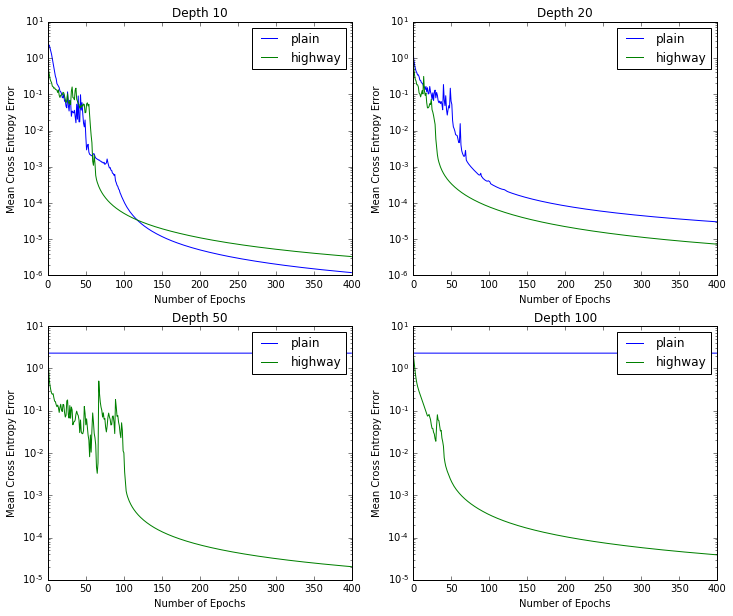

In [45]:
# Plotting results for the Depth 10,20,50,100 architecture

fig = plt.figure(figsize=((12,10)))
plt.subplot(221)
plt.plot(xentropy_plain_10_df.XEntropy.values,label='plain')
plt.plot(xentropy_highway_10_df.XEntropy.values,label='highway')
plt.yscale('log')
plt.ylabel('Mean Cross Entropy Error')
plt.xlabel('Number of Epochs')
plt.legend()
plt.title('Depth 10')


plt.subplot(222)
plt.plot(xentropy_plain_20_df.XEntropy.values,label='plain')
plt.plot(xentropy_highway_20_df.XEntropy.values,label='highway')
plt.yscale('log')
plt.ylabel('Mean Cross Entropy Error')
plt.xlabel('Number of Epochs')
plt.legend()
plt.title('Depth 20')

plt.subplot(223)
plt.plot(xentropy_plain_50_df.XEntropy.values,label='plain')
plt.plot(xentropy_highway_50_df.XEntropy.values,label='highway')
plt.yscale('log')
plt.ylabel('Mean Cross Entropy Error')
plt.xlabel('Number of Epochs')
plt.legend()
plt.title('Depth 50')

plt.subplot(224)
plt.plot(xentropy_plain_100_df.XEntropy.values,label='plain')
plt.plot(xentropy_highway_100_df.XEntropy.values,label='highway')
plt.yscale('log')
plt.ylabel('Mean Cross Entropy Error')
plt.xlabel('Number of Epochs')
plt.title('Depth 100')
plt.legend()
plt.show()

fig.savefig('figure1.png')

# Deep Residual Learning for Image Recognition

In [ ]:
from project_nn_resnet import load_data_SVHN
from ConvHighwayNetworks import test_ConvHighway
data = load_data_SVHN(ds_rate=None,theano_shared=True, validation=False)

In [ ]:
test_ConvHighway(data, model=1, learning_rate=0.025, lr_decay=0.1, momentum=0.9, 
                 step_values = [30000, 100000, 150000, 175000], 
                 n_epochs=400, b_T=-2, drop_rate=0.2, batch_size=100, verbose=True)

In [ ]:
# Highway 1
test_ConvHighway(data, model=1, learning_rate=0.025, lr_decay=0.1, momentum=0.9,
                 step_values = [100000, 150000, 175000], 
                 n_epochs=400, b_T=-2, drop_rate=0.2, batch_size=100, verbose=True)

In [ ]:
## Highway 2
# used different step_values
test_ConvHighway(data, model=2, learning_rate=0.025, lr_decay=0.316, 
                 momentum=0.9, step_values = [30000, 100000, 130000, 150000, 165000, 175000], 
                 n_epochs=400, b_T=-2, drop_rate=0.2, batch_size=100, verbose=True)

In [ ]:
## ResNet 1
test_ConvHighway(data, model=11, learning_rate=0.025, lr_decay=0.1, momentum=0.9,
                 step_values = [100000, 150000, 175000], 
                 n_epochs=400, drop_rate=0.2, batch_size=100, verbose=True)

In [ ]:
## ResNet 2
test_ConvHighway(data, model=12, learning_rate=0.025, lr_decay=0.1, momentum=0.9,
                 step_values = [100000, 150000, 175000], 
                 n_epochs=400, drop_rate=0.2, batch_size=100, verbose=True)